In [279]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [280]:
df=pd.read_csv('tested.csv')

In [281]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [282]:
df.shape

(418, 12)

In [283]:
df.size

5016

In [284]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Visualization of Given Data

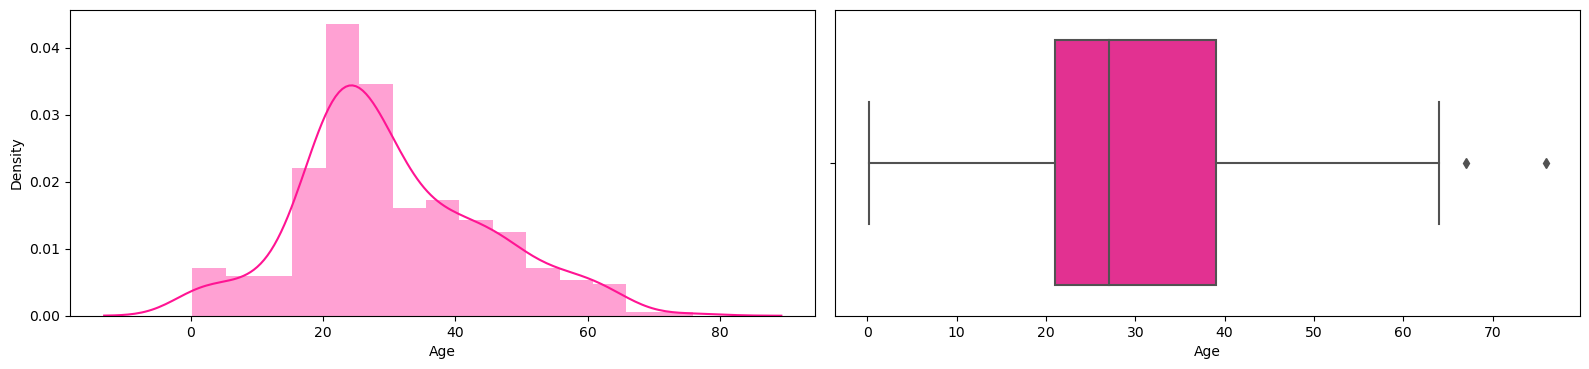

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.distplot(df['Age'],color='DeepPink')
plt.subplot(2,2,2)
sns.boxplot(df['Age'],color='DeepPink')

plt.tight_layout()
plt.show()

In [286]:
df['Age'].value_counts()


21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

## Observations

According to this observation people with age 21 and 24 has the highest count that the rest ages

From the box plot we can say that there are few outliers are present in the data


#### We found that count of age number which with the highest count now we will find the total counts of men and women

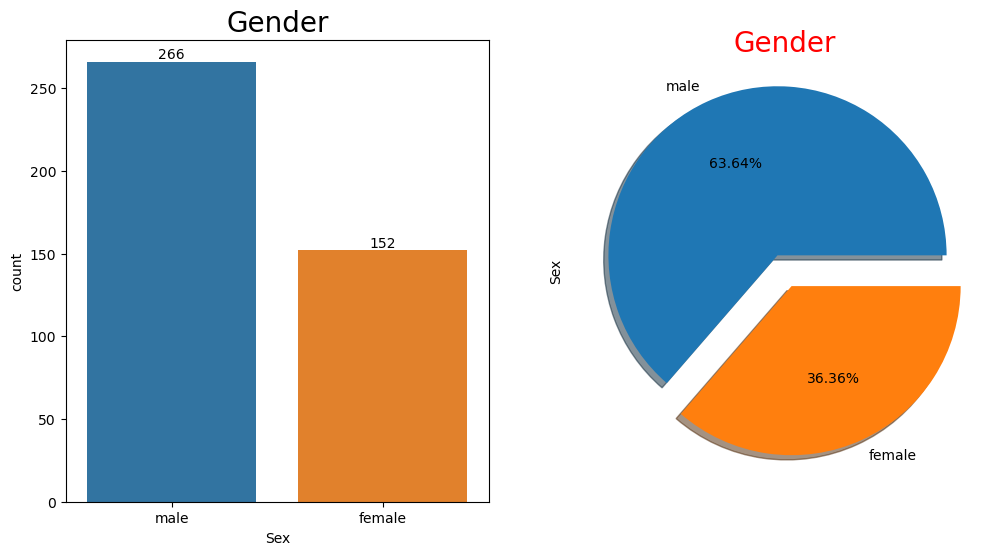

In [287]:
plt.figure(figsize=(12,6))

ax=plt.subplot(1,2,1)
ax=sns.countplot(x='Sex',data=df)
ax.bar_label(ax.containers[0]) # This line adds labels to the bars indicating the count for each category.
plt.title("Gender",fontsize=20)
ax=plt.subplot(1,2,2)
ax=df['Sex'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.2f%%',shadow=True);##autopct parameter will format the percentage values in each slice of the pie chart to two decimal places autopct parameter will format the percentage values in each slice of the pie chart to two decimal places
ax.set_title(label='Gender',fontsize=20,color='Red',font='LUCIDA Calligraphy');


#### observations

We can see that the number of males is almost twice the number of females 

By this we only got total number of people in induvidual gender but we are going find the range of age according to the individual gender

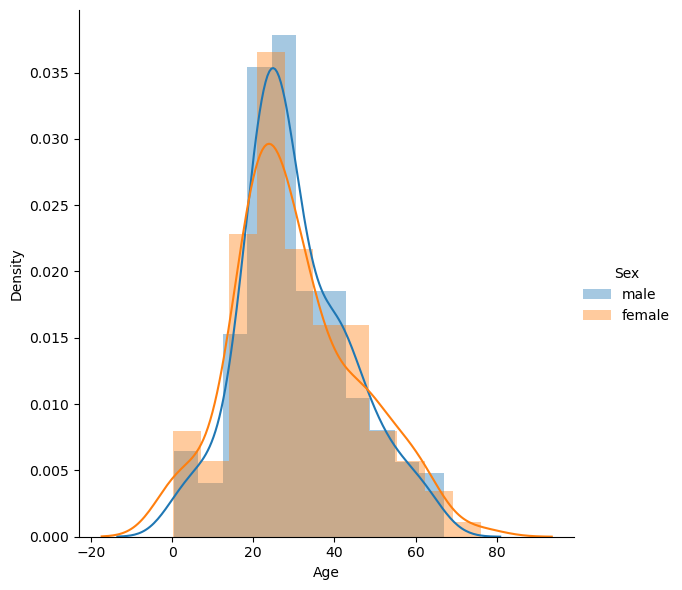

In [288]:
sns.FacetGrid(df,hue='Sex',height=6).map(sns.distplot,'Age').add_legend() ##A facet grid is a way of visualizing data by creating multiple plots
##The FacetGrid object takes two parameters: the DataFrame that you want to plot and the categorical variable that you want to use to create the different plots.
plt.show()

#### observations
1. most of the male people age fall under 25 to 30
2. most of female people age fall between 30 to 35 

We Know that threre will be different types of classes will be there in the ship and all ages people will be distributed among those classes

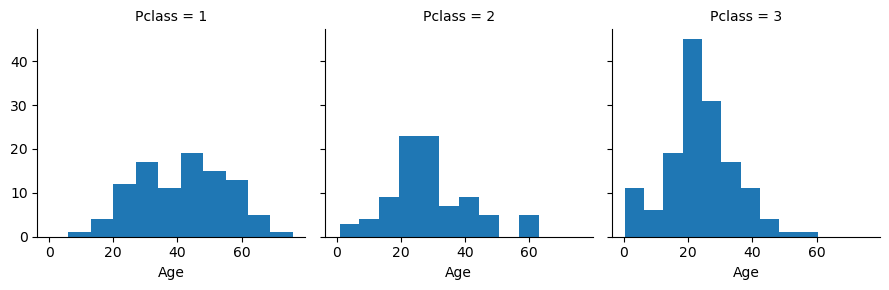

In [289]:
g=sns.FacetGrid(df,col="Pclass") # this line creates a 3 p-class facet grid because the max value of the p-class is 3
g=g.map(plt.hist,"Age")# this line maps a histogram plot onto each subplot of the FacetGrid
# Specifically, it plots the count of  the Age, for each value of the 'Pclass' in DataFrame. It uses histogram plot.

#### Observations

We can see that in class 3, the count people of age Between 20 and 30 is more compared to the rest of the groups

We know travelling in a ship like titanic is not possiable without good amount of 'Money', But the fare may vary for people of different age groups and type of class we are selecting for the journey as well as the where we boarded the ship along its journey

Lets find the relation between all these variables

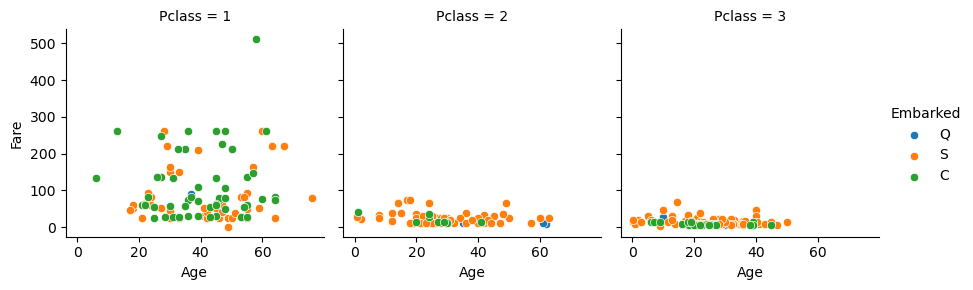

In [290]:
g=sns.FacetGrid(df,col="Pclass",hue='Embarked')
# map_dataframe() is used to apply a plotting function to each group of a DataFrame. 
# This function takes three arguments:A plotting type as its first argument and the name of the grouping variable as its second argument.
g.map_dataframe(sns.scatterplot,x="Age",y="Fare")
g.add_legend()
plt.show()

#### Observations

1. We can see that Prople in class=1 paid more price than the remaining class people so they are more likely to be wealthy people
2. We can see that the people in class=1 are more aged people then remaining two classes
3. We can see that People who embarked at point Q seemed to pay less and seemed to have lesser classes like Class=2 and Class=3 may be due to Q is nearer to the destination of the ship

We have visulazied fare according to the embarked place , age and got useful Insights But the info is too much scatterd dont you think?

Now we are going to visualize the fare in way that we can see that at what fare most people boarded the ship

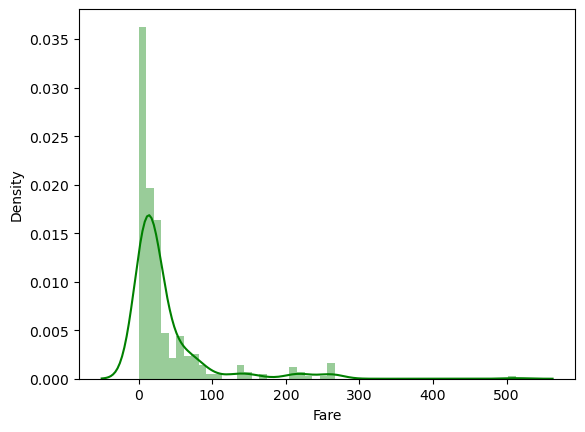

In [291]:
sns.distplot(df['Fare'],color='g')
plt.show()

We can see that most people see that most of the passengers paid between 0 to 100 and very less people above 100, So we can say that most people chose economical travel over luxurios travel

#### Till this point we visulalized the columns like Age,Fare,Embarked,Gender But now We are now moving towords the most important column of the dataset  that is, Survied column 

We are going to know the survival rates according to which class the passengers in

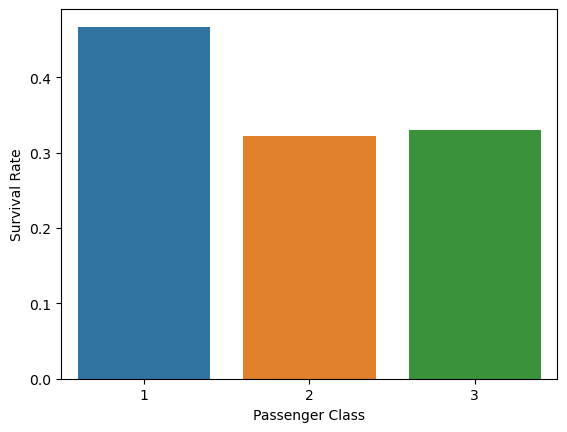

In [292]:
survived_by_class = df.groupby('Pclass')['Survived'].mean()
sns.barplot(survived_by_class.index, survived_by_class)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

#### Obsevations

1. We can see that Survival rate of Class=1 is the highest
2. Survival rate of Class=2 and Class=3 are almost same but Class=3 is slightly higher than the Class=2

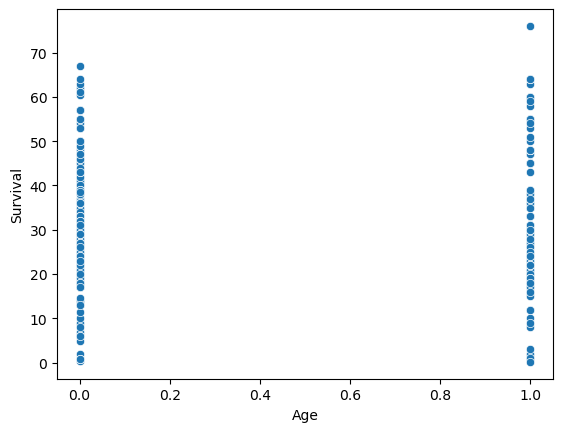

In [293]:
sns.scatterplot(data=df,x='Survived', y='Age' )
plt.xlabel('Age')
plt.ylabel('Survival')
plt.show()

#### Observations

1. We can see most people who survived are between Age 10 to 30
2. Also the Survival rate is  increased Arouns the age 50 but not above 60 maybe because it is hard for the old people to swim
3. We can Observe few outliers in the survived values Which we will look into in a few steps

#### We have analyzed a lot of columns but now we have see how closely these all are correlated to each other For this we are going to use a heatmap

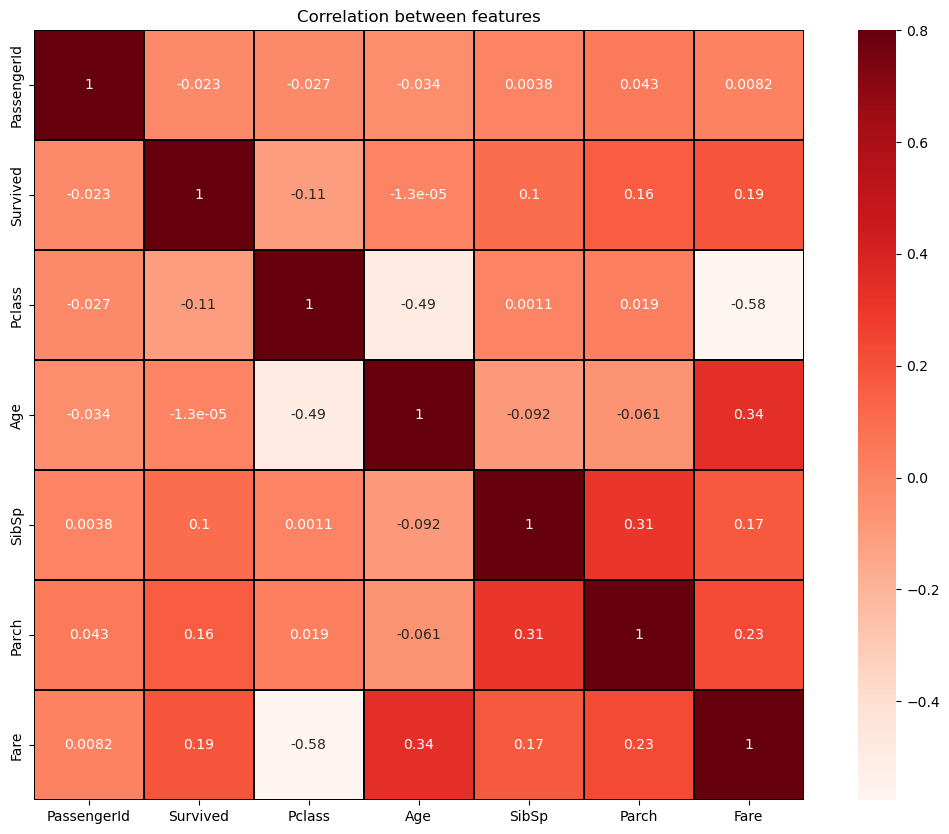

In [294]:
corr=df.corr()#["Survived"]
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='Reds',linecolor="black")
plt.title('Correlation between features')
plt.show()

#### Observations

1. There is a strong positive correlation between P-class and Fare(higherclass people pay high fare like class=1)
2. There is also a strong negative correlation between P-class and Survived(This means that passengers in lower classes were less likely to survive)
3. There are also a  weak correlations in the dataset between Age and Survived(older passengers were slightly less likely to survive)
4.  a weak negative correlation between SibSp and Survived(passengers with more siblings or spouses were slightly less likely to survive)

## Data PreProcessing

We are going to find how many null values are present in the dataset as these null valuse can cause some problems while taining the model and also an give wrong output

In [295]:
df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

Well That! is a big number of missing values , now we try to see from each column how much percent is missing 

In [296]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percentage=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values=pd.concat([missing_number,missing_percentage],axis=1,keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


Lets visualize these missing values to get better look of whats missing

<AxesSubplot:>

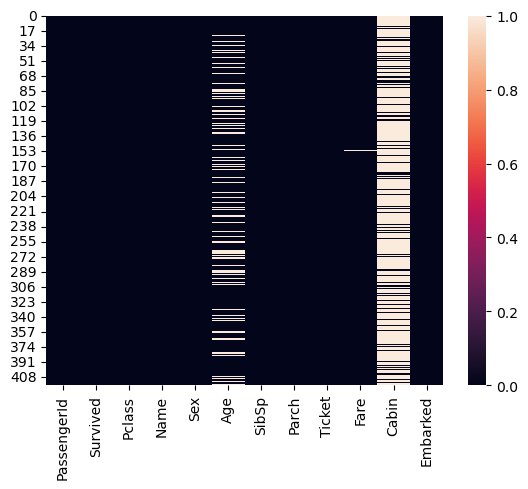

In [297]:
sns.heatmap(df.isnull())

We can see that most of the cabin section is missing , few of the age detalis are missing and only a single value of fare is missing ,oh! maybe its jack from the movie just kidding!

## Dealing with the null values in Dataset

Now we are going to impute these missing values useing mean values as it has less missing values

In [298]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())


Now as for the Cabin column it has around 78 persent missing values filling those values useing any imputing technique may cause biased output

And there are few columns which does not contribute to the training of the model so we are going to drop those columns

In [299]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


<AxesSubplot:>

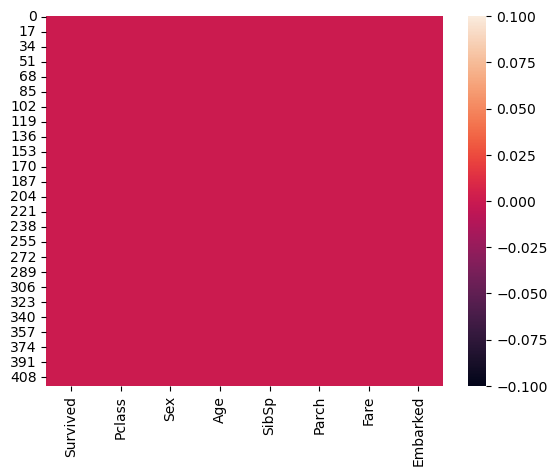

In [300]:
sns.heatmap(df.isnull())

We can see that We have dealt with all the missing values

Now to train our machine learning model We have to convert all categorical values into numerical values for that we are going to use Encoder 

In [301]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked']) #  Ordinal Encoding is a technique that assigns an integer value to each category based on its order or rank.
#For example, if a categorical variable has three categories (low, medium, and high), then it would be encoded as 1, 2, and 3, respectively.
df_encoded=encoder.fit_transform(df)# encoder.fit_transform(df) fits the encoder to the categorical data in df and transforms the data into numerical form.
#The fit_transform method first fits the encoder to the data by learning the mapping between the categories and their numerical representations. It then applies this mapping to the data and transforms the categorical variables into numerical variables
df_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.5,0,0,7.8292,1
1,2,1,2,47.0,1,0,7.0000,2
2,1,2,1,62.0,0,0,9.6875,1
3,1,1,1,27.0,0,0,8.6625,2
4,2,1,2,22.0,1,1,12.2875,2


Now we have done with Converting categorical to numerical So we can Start Training our model 

In [302]:
x=df_encoded.drop(['Survived'],axis=1)
y=df['Survived']

In [303]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [304]:
print("x_train - >  ",X_train.shape)
print("x_test - >  ",X_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (292, 7)
x_test - >   (126, 7)
y_train - >   (292,)
y_test - >   (126,)


We have split our dataset into train and test now we are going to test machine learning models on this training data set and test our data on the test dataset

In [305]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

def Scores(model, y_pred):
    print("Training set score: {:.2f}".format(model.score(X_train, y_train)),'\n')
    print("Test set score: {:.2f}".format(model.score(X_test, y_test)),'\n')
    print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test,y_pred)),'\n')
    print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred),'\n')
    print("Classification_Report: \n",classification_report(y_test,y_pred))

In [306]:
Scores(lr,y_pred_lr)

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[78  0]
 [ 0 48]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

In [308]:
Scores(rf_ent,y_pred_rfe)

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[78  0]
 [ 0 48]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [309]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Gnb = GaussianNB()
Gnb.fit(X_train,y_train)
y_pred_Gnb = Gnb.predict(X_test)

In [310]:
Scores(Gnb,y_pred_Gnb)

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[78  0]
 [ 0 48]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [311]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Bnb = BernoulliNB()
Bnb.fit(X_train,y_train)
y_pred_Bnb = Bnb.predict(X_test)

In [312]:
Scores(Bnb,y_pred_Bnb)

Training set score: 0.64 

Test set score: 0.64 

Accuracy Score: 0.64 

Confusion Matrix: 
 [[68 10]
 [35 13]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       0.66      0.87      0.75        78
           1       0.57      0.27      0.37        48

    accuracy                           0.64       126
   macro avg       0.61      0.57      0.56       126
weighted avg       0.62      0.64      0.60       126



In [313]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [314]:
Scores(knn,y_pred_knn)

Training set score: 0.71 

Test set score: 0.67 

Accuracy Score: 0.67 

Confusion Matrix: 
 [[70  8]
 [33 15]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       0.68      0.90      0.77        78
           1       0.65      0.31      0.42        48

    accuracy                           0.67       126
   macro avg       0.67      0.60      0.60       126
weighted avg       0.67      0.67      0.64       126



In [315]:
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear',gamma='auto',probability=True)
svc_linear.fit(X_train,y_train)
y_pred_svc_linear = svc_linear.predict(X_test)

In [316]:
Scores(svc_linear,y_pred_svc_linear)

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[78  0]
 [ 0 48]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [317]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)


In [318]:
Scores(ada,y_pred_ada)

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[78  0]
 [ 0 48]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [319]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)


In [320]:
Scores(gbm,y_pred_gbm)

Training set score: 1.00 

Test set score: 1.00 

Accuracy Score: 1.00 

Confusion Matrix: 
 [[78  0]
 [ 0 48]] 

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



We can see that most of the models work very well with the data set and give acuracy score of 100 like 

1. LogisticRegression
2. RandomForestClassifier
3. GaussianNB
4. AdaBoostClassifier
5. GradientBoostingClassifier

We can use any of these models to predict on new data to know weather a person can survive this disater or not